# Introduction
The field of **Dimentionality Reduction** is all about *discovering non-linear relationships in data
<br> that are not obvious in the original feature space.*

## Why do we need Dimentionality Reduction?

- **Visualization**: if we reduce the number of dimentions in data into 2 or 3 space, we can visualize it. 
  <br>This helps us to analyze the data
<br>
<br>
- **Data Compression**
    - easier storage and processing of data
<br>
<br>
- **High dimention data has problems**:
    - high time/space complexity
    - prone to overfitting
    - not all features are relevant, thus if we can reduce the dimention we can reduce the noise.

## Example

### Reducing from D=2 into d=1
- rather then representing each point with **two** coordinates
    <br> we can represent each point by **one** coordinate (corresponding to its projection on the red line)
- by doing this we incure a bit of error as these points do not exactly lie on the red line.

### Reducing from D=3 into d=2
- similarly, in the drawing on the right, we can see that the data rufly lies on a surface. Tuhs can be described using only 2 dimentions.

<img src='images/pca1.png' />

# Definitions

## Variance
The variance is the measure of **how spread out** some data is.
<br>(the average distance of the data point to the mean)
- $variance = (std)^2$


<img src='images/data-normalization.png' />

## Eigenvectors and Eigenvalues
(eigen is the word 'characteristic' in German)

A (non-zero) vector $v$ of dimension $N$ is an **eigenvector** of a square $N × N$ matrix $A$ if it satisfies the linear equation: $Av =\lambda v$
<br>where $λ$ is a scalar, termed the **eigenvalue** corresponding to $v$.

That is, the *eigenvectors* are the vectors that the linear transformation $A$ merely **elongates or shrinks**, 
<br>and the amount that they elongate/shrink by is the *eigenvalue*.

<img src='images/eigen-decomposition.png' />

# PCA

PCA is used as a method for Dimentionality Reduction

- PCA transorms a set of variables into a new set of variables which are a linear combination of the original variables.
- These new variables are known as **Principle Components**.
- PCA is an ortogonal linear transformation that transform data into a new coordinate system such that 
    - the gratest variance by some projection of the data lies on the **first** principle component
    - the second gratest variance lies on the **second** principle component
    - etc.

<img src='images/variance.png' />

# PCA intuition

## Data standardization
Our first step before we do PCA is to standardize data.
<br>We need to standardize data because (TODO: why?)
<br>Standardizing means **puting the data on the same scale**
<br> This means our data should have mean = 0 and variance = 1


## Maximize variance
PCA is a variance maximizing exersize.
<br>It projects the original data on a direction that maximizes varience.


## What is a rank of a matrix
<img src='images/ran2.png' />

## Here is what will be presented
- First we'll make some data to apply PCA to
- How to use **PCA()** function from sklearn to do PCA.
- How to determine how much variation each principle component accounts for
- How to draw PCA graph using matplotlib
- Ho to examine the loading scores to determine what variables have the largest effect on the graph

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing # for scaling the data
import matplotlib.pyplot as plt

## Generate the sample dataset

In [2]:
# generate an array of 100 gene names (row names)
genes = ['gene' + str(i) for i in range(1,101)]

# we now create arrays of sample names (column names)
# we have 5 'wild types' or 'wt' samples and 5 'knock out' or 'ko' samples
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

# create a dataframe to store the made-up data 
# (the starts unpack the wt and ko arrays)
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

# for each gene in the index, we create 5 values for the 'wt' samples and 5 values for the 'ko' samples
# the made up data comes from two poisson distributions (one for the 'wt' samples and the other for 'ko')
# for each gene we select a new mean for the poisson distribution (the means can vary between 10-1000)
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.shape)
data.head()

(100, 10)


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,976,995,1011,997,993,314,317,284,302,279
gene2,504,479,466,472,487,268,321,291,280,284
gene3,1019,1020,971,992,988,282,346,343,339,340
gene4,374,391,370,372,389,172,171,174,169,165
gene5,596,567,606,600,647,62,60,61,64,50


## scale the data
before we do PCA we have to scale and center our data
<br>after scaling: the average value for each gene will be 0 and the standard deviation will be 1

In [46]:
# (the sacle function expect samples as rows instead of columns)
scaled_data = preprocessing.scale(data.T)

# you can also use: scaled_data = preprocessing.StandardScaler().fit_transform(data.T)

/home/yossi/dev/py/anomalies/pytorch/.env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


## PCA

In [32]:
pca = PCA()

# this is where all the math goes, 
# (i.e: calculate loading scores and the variation each principle component accounts for)
pca.fit(scaled_data)

# this is where we generate coordinates for the PCA graph based on the loading scores and the scaled data.
pca_data = pca.transform(scaled_data)

## Draw a scree plot
we'll start with a scree plot to see how many principle components should we use

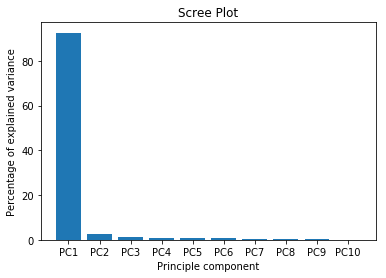

In [35]:
# calculate the percentage of variation each principle component accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

labels = ['PC' + str(i) for i in range(1, len(per_var) + 1)] # 'PC1', 'PC2', etc.

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)

plt.ylabel('Percentage of explained variance')
plt.xlabel('Principle component')
plt.title('Scree Plot')
plt.show()

# we can see the almost all of the variation goes into the first principle component, so
# a 2-D graph should do a good job in representing the original data.

## Draw the PCA graph

In [40]:
# we'll put the new coordinates created by pca.transform(scaled_data) into a matrix
# where the rows have sample labels and the columns have PC labels
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.583738,-0.369369,-0.358148,-0.919604,-0.521742,2.081534,-0.520984,0.047490,-0.172291,3.435888e-15
wt2,9.963689,3.296437,-0.419593,1.841315,-0.426680,-0.068057,0.165852,0.019934,-0.043249,2.392090e-15
wt3,9.611746,0.735926,0.137615,-1.618333,0.922588,-0.606341,1.053338,0.654127,-0.105342,3.510422e-15
wt4,9.447182,-1.201107,-1.267179,-0.301881,0.020941,-1.149959,-1.046579,-0.249303,0.734267,3.433818e-15
wt5,9.488012,-2.540053,1.946657,0.973481,0.022912,-0.264799,0.315010,-0.459970,-0.407144,3.774606e-15
ko1,-9.705712,-1.479546,-0.709586,0.655074,-0.762185,-0.384960,-0.257989,1.119131,-0.540206,-2.815000e-15
ko2,-9.736142,0.130934,0.048725,0.763344,2.212489,0.618870,-0.482450,0.027298,0.113625,-2.861332e-15
ko3,-9.738483,0.876273,1.987575,-0.397551,-0.836537,0.087964,-0.074707,0.234925,0.955763,-3.082574e-15
ko4,-9.565771,1.547398,0.162115,-1.133322,-0.273539,-0.650618,-0.541782,-0.762599,-0.857287,-1.831590e-15
ko5,-9.348259,-0.996893,-1.528180,0.137476,-0.358246,0.336365,1.390291,-0.631033,0.321865,-3.207791e-15


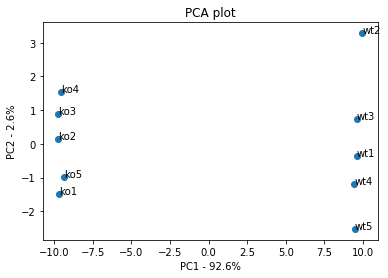

In [47]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA plot')
plt.xlabel('PC1 - {}%'.format(per_var[0]))
plt.ylabel('PC2 - {}%'.format(per_var[1]))

# add sample names to the graph
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

The 'ko' samples are clustered on the left, suggesting they are correlated with each other.

The 'wt' samples are clustered on the right, also correlated with each other.

Lastly, lets look at the loading scores for PC1 to determine which genes had the largest influence
<br> on separating the two clusters along the x-axis.

In [49]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(sorted_loading_scores[top_10_genes])

gene83    0.103920
gene50    0.103918
gene74    0.103911
gene84    0.103900
gene43    0.103890
gene6     0.103889
gene98    0.103887
gene45    0.103867
gene42    0.103842
gene90    0.103833
dtype: float64
